In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

In [82]:
# 1. Unggah dataset CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


Saving data.csv to data (7).csv


In [83]:

# 2. Hapus kolom yang tidak berguna
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# 3. Pisahkan variabel yang dapat digunakan dan yang tidak
usable_columns = df.select_dtypes(include=[np.number, 'object']).columns.tolist()
unusable_columns = [col for col in df.columns if col not in usable_columns]
print("Usable Columns:", usable_columns)
print("Unusable Columns:", unusable_columns)

df = df[usable_columns]  # Gunakan hanya kolom yang dapat digunakan


Usable Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Unusable Columns: []


In [84]:
# 4. Encoding pada kolom 'diagnosis' jika ada
if 'diagnosis' in df.columns:
    encoder = LabelEncoder()
    df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [85]:
# 5. Tangani missing values sebelum standarisasi
df.fillna(df.median(), inplace=True)

# 6. Hapus kolom dengan variansi nol
variance = df.var()
zero_variance_columns = variance[variance == 0].index.tolist()
df.drop(columns=zero_variance_columns, inplace=True)

In [86]:
# 7. Standarisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Data latih: (455, 30) (455,)
Data uji: (114, 30) (114,)


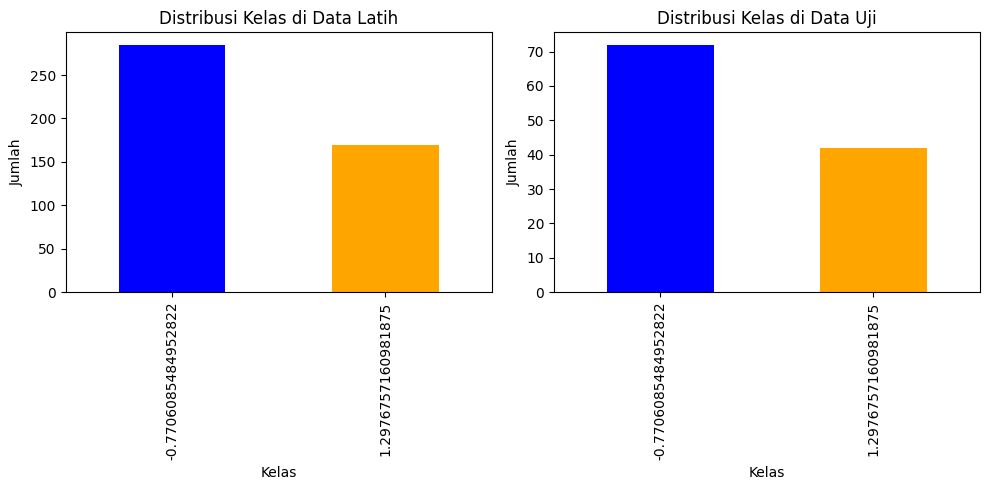

In [87]:
# 8. Stratified Split Data untuk latih dan uji (80:20)
y = df['diagnosis'] if 'diagnosis' in df.columns else df.iloc[:, -1]  # Target label
df.drop(columns=['diagnosis'], inplace=True, errors='ignore')
X = df  # Fitur

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Data latih:", X_train.shape, y_train.shape)
print("Data uji:", X_test.shape, y_test.shape)

# 9. Visualisasi jumlah kelas dalam data latih dan data uji
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribusi Kelas di Data Latih")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribusi Kelas di Data Uji")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()
